In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('data/COVID-19_Case_Surveillance_Public_Use_Data.csv')

In [13]:
data

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2021/04/25,2021/04/25,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Missing,Missing
1,2020/12/22,2020/12/22,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Unknown
2,2020/11/19,2020/11/25,NaN,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Missing
3,2020/12/30,2020/12/31,NaN,2020/12/30,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,2021/03/26,2021/03/31,2021/03/27,2021/03/26,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
27879428,2020/12/14,2020/12/14,NaN,NaN,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Unknown,Missing
27879429,2020/07/24,2020/07/29,NaN,2020/07/24,Probable Case,Female,50 - 59 Years,"White, Non-Hispanic",No,No,No,Missing
27879430,2021/01/04,2021/03/03,NaN,2021/01/04,Laboratory-confirmed case,Female,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,Missing,Missing
27879431,2021/03/03,2021/04/20,2021/03/03,NaN,Probable Case,Female,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,No,Missing


Text(0, 0.5, 'Number of instances')

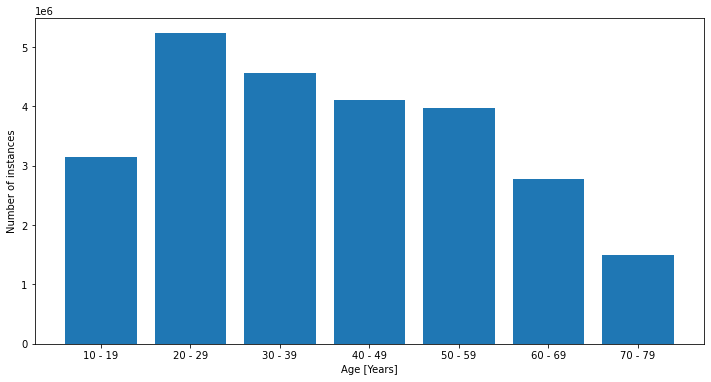

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar(range(1, 8), [np.sum(data.age_group == f'{i}0 - {i}9 Years') for i in range(1, 8)])
ax.set_xticks(range(1, 8))
ax.set_xticklabels([f'{i}0 - {i}9' for i in range(1, 8)]);
ax.set_xlabel('Age [Years]'); ax.set_ylabel('Number of instances')

In [15]:
data = data.drop(columns=['cdc_case_earliest_dt ', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'])
data.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Missing,Missing,Missing
1,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Unknown
2,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Missing
3,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,Unknown


In [16]:
data.current_status = data.current_status.map({'Laboratory-confirmed case': 1, 'Probable Case': 0})
data.sex = data.sex.map({'Missing': np.nan, 'Male': 0, 'Other': np.nan, 'Female': 1})
data.hosp_yn = data.hosp_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.icu_yn = data.icu_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.death_yn = data.death_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.medcond_yn = data.medcond_yn.map({'Missing': np.nan, 'No': 0, 'Unknown': np.nan, 'Yes': 1})
data.race_ethnicity_combined = data.race_ethnicity_combined.replace(to_replace=r'Missing|Unknown', value='nan', regex=True)
data.head()

,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,1,0.0,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,NaN,NaN
1,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,NaN,0.0,NaN
2,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,0.0,0.0,NaN
3,1,0.0,10 - 19 Years,"Black, Non-Hispanic",NaN,NaN,NaN,NaN
4,1,0.0,10 - 19 Years,"Black, Non-Hispanic",0.0,NaN,0.0,NaN


Text(0, 0.5, 'Proportion of instances')

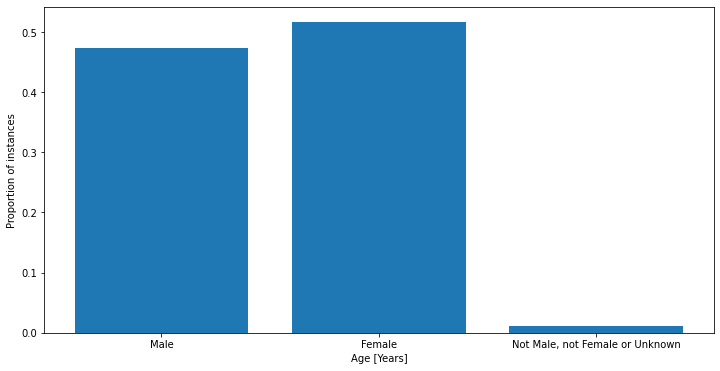

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.bar([0, 1, 2], [np.mean(data.sex == 0), np.mean(data.sex == 1), np.mean(np.isnan(data.sex))])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Male', 'Female', 'Not Male, not Female or Unknown']);
ax.set_xlabel('Age [Years]'); ax.set_ylabel('Proportion of instances')

In [18]:
print(f'{np.mean(data.current_status == 1).round(2) * 100} % of cases are lab-confirmed')

89.0 % of cases are lab-confirmed


In [19]:
eth = np.unique(data.race_ethnicity_combined.astype('str'))

Text(0.5, 0, 'Number of instances')

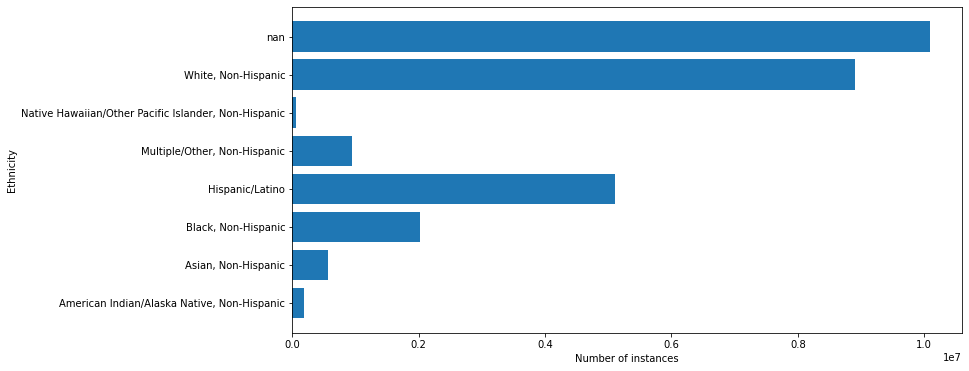

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.barh(range(len(eth)), [np.sum(data.race_ethnicity_combined.astype('str') == e) for e in eth])
ax.set_yticks(range(len(eth)))
ax.set_yticklabels([e for e in eth]);
ax.set_ylabel('Ethnicity'); ax.set_xlabel('Number of instances')